In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from datetime import datetime, timedelta
import seaborn as sns

def datetotime(col):
    #returns a list of datetime objects
    #takes in a df column
    x=[]
    for entry in col:
        x.append(datetime.strptime(entry,'%Y-%m-%dT%H:%M:%SZ'))
    return x

In [4]:

urlvalpk=f'https://data.ripple.com/v2/stats/?start=2020-01-22&end=2020-01-22&interval=hour'
#res = requests.get(url1)
resmain= requests.get(urlvalpk)
resmain.json()


{'result': 'success',
 'count': 20,
 'stats': [{'date': '2020-01-22T00:00:00Z',
   'type': {'AccountSet': 24,
    'OfferCancel': 621,
    'OfferCreate': 27208,
    'Payment': 6819,
    'TrustSet': 4},
   'result': {'tecDST_TAG_NEEDED': 13,
    'tecKILLED': 1,
    'tecNO_DST_INSUF_XRP': 3,
    'tecPATH_DRY': 4633,
    'tecUNFUNDED_PAYMENT': 11,
    'tesSUCCESS': 30015},
   'metric': {'accounts_created': 20,
    'exchanges_count': 5,
    'ledger_count': 945,
    'ledger_interval': 3.8011,
    'payments_count': 2157,
    'transaction_count': 34676,
    'tx_per_ledger': 36.697}},
  {'date': '2020-01-22T01:00:00Z',
   'type': {'AccountSet': 24,
    'OfferCancel': 485,
    'OfferCreate': 27143,
    'Payment': 7076,
    'SetRegularKey': 1,
    'TrustSet': 6},
   'result': {'tecDST_TAG_NEEDED': 13,
    'tecNO_DST_INSUF_XRP': 1,
    'tecPATH_DRY': 4643,
    'tecUNFUNDED_PAYMENT': 66,
    'tesSUCCESS': 30012},
   'metric': {'accounts_created': 20,
    'exchanges_count': 5,
    'ledger_count': 94

In [25]:

urlvalpk1=f'https://data.ripple.com/v2/ledgers/'
#ledger_identifier=2020-01-22T11:20:00Z
resmain1= requests.get(urlvalpk1)
x1=resmain1.json()
x1['ledger']['tx_count']



'33'

In [31]:
def check_tx_count_great200():
    url=f'https://data.ripple.com/v2/ledgers/'
    #ledger_identifier=2020-01-22T11:20:00Z\
    resmain= requests.get(url)
    x=resmain.json()
    if (int(x['ledger']['tx_count'])>200):
        return True
    else:
        return False


In [32]:
check_tx_count_great200()

False

In [14]:
validator_accts = pd.DataFrame(resmain.json()['validators'])
#xrp_accts
mainvalidator_accts=validator_accts[validator_accts['chain']=='main']
firstkey=mainvalidator_accts['validation_public_key'].iloc[10]
secondkey=mainvalidator_accts['validation_public_key'].iloc[59]
thirdkey=mainvalidator_accts['validation_public_key'].iloc[30]

#mainvalidator_accts
#xrp_accts.to_csv("test.csv",index=False,sep=',')

KeyError: 'validators'

In [64]:
mainvalidator_accts['validation_public_key']

0      nHUFE9prPXPrHcG3SkwP1UzAQbSphqyQkQK9ATXLZsfkez...
1      nHDB2PAPYqF86j9j3c6w1F1ZqwvQfiWcFShZ9Pokg9q4oh...
2      nHB8QMKGt9VB4Vg71VszjBVQnDW3v3QudM4DwFaJfy96bj...
3      nHBidG3pZK11zQD6kpNDoAhDxH6WLGui6ZxSbUx7LSqLHs...
4      nHDwHQGjKTz6R6pFigSSrNBrhNYyUGFPHA75HiTccTCQzu...
5      nHUED59jjpQ5QbNhesXMhqii9gA8UfbBmv3i5StgyxG98q...
6      nHUpJSKQTZdB1TDkbCREMuf8vEqFkk84BcvZDhsQsDufFD...
7      nHU95JxeaHJoSdpE7R49Mxp4611Yk5yL9SGEc12UDJLr4o...
8      nHUcNC5ni7XjVYfCMe38Rm3KQaq27jw7wJpcUYdo4miWwp...
9      nHUVPzAmAmQ2QSc4oE1iLfsGi17qN2ado8PhxvgEkou76F...
10     nHB5kpvUaEpvCtwu31fMf6dTuuCNnWRctWrV3UEZ9rbtPd...
11     nHDH7bQJpVfDhVSqdui3Z8GPvKEBQpo6AKHcnXe21zoD4n...
12     nHBtDzdRDykxiuv7uSMPTcGexNm879RUUz5GW4h1qgjbty...
13     nHDDasc9BHNB99PW8KUduS8Phqg8NPUmjufzMU6HGGDMUH...
14     nHU2Y1mLGDvTbc2dpvpkQ16qdeTKv2aJwGJHFySSB9U3jk...
15     nHUKp8XUkaFN6GzQ3o4qTE1w9aAD5uFjZ8vDt6pwjBsTFR...
16     nHUon2tpyJEHHYGmxqeGu37cvPYHzrMtUNQFVdCgGNvEkj...
17     nHUUrjuEMtvzzTsiW2xKinUt

In [65]:
firstkey

'nHB5kpvUaEpvCtwu31fMf6dTuuCNnWRctWrV3UEZ9rbtPdpvbUvJ'

In [67]:
url1 = f'https://data.ripple.com/v2/network/validators/'+firstkey+'/reports?start=2018-06-04T00:00:00Z&end=2018-11-02T00:00:00Z'
url2= f'https://data.ripple.com/v2/network/validators/'+secondkey+'/reports?start=2018-06-04T00:00:00Z&end=2018-11-02T00:00:00Z'
url3= f'https://data.ripple.com/v2/network/validators/'+thirdkey+'/reports?start=2018-06-04T00:00:00Z&end=2018-11-02T00:00:00Z'



res1= requests.get(url1)
res1.json()
validator_reports1 = pd.DataFrame(res1.json()['reports'])

res2= requests.get(url2)
res2.json()
validator_reports2 = pd.DataFrame(res2.json()['reports'])

res3= requests.get(url3)
res3.json()
validator_reports3 = pd.DataFrame(res3.json()['reports'])


res2.json()




#first_account_scores = pd.DataFrame(res1.json())

{'result': 'success',
 'count': 150,
 'reports': [{'validation_public_key': 'nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgWNWoG4f',
   'date': '2018-06-06T00:00:00Z',
   'chain': 'main',
   'score': '0.8813',
   'total': '20398',
   'missed': '2421'},
  {'validation_public_key': 'nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgWNWoG4f',
   'date': '2018-06-07T00:00:00Z',
   'chain': 'main',
   'score': '0.9930',
   'total': '23191',
   'missed': '162'},
  {'validation_public_key': 'nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgWNWoG4f',
   'date': '2018-06-08T00:00:00Z',
   'chain': 'main',
   'score': '0.9924',
   'total': '23057',
   'missed': '175'},
  {'validation_public_key': 'nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgWNWoG4f',
   'date': '2018-06-09T00:00:00Z',
   'chain': 'main',
   'score': '0.9955',
   'total': '23296',
   'missed': '104'},
  {'validation_public_key': 'nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgWNWoG4f',
   'date': '2018-06-10T00:00:00Z',
   'chain': 'main',


In [90]:
res2.json()

{'result': 'success',
 'count': 150,
 'reports': [{'validation_public_key': 'nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgWNWoG4f',
   'date': '2018-06-06T00:00:00Z',
   'chain': 'main',
   'score': '0.8813',
   'total': '20398',
   'missed': '2421'},
  {'validation_public_key': 'nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgWNWoG4f',
   'date': '2018-06-07T00:00:00Z',
   'chain': 'main',
   'score': '0.9930',
   'total': '23191',
   'missed': '162'},
  {'validation_public_key': 'nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgWNWoG4f',
   'date': '2018-06-08T00:00:00Z',
   'chain': 'main',
   'score': '0.9924',
   'total': '23057',
   'missed': '175'},
  {'validation_public_key': 'nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgWNWoG4f',
   'date': '2018-06-09T00:00:00Z',
   'chain': 'main',
   'score': '0.9955',
   'total': '23296',
   'missed': '104'},
  {'validation_public_key': 'nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgWNWoG4f',
   'date': '2018-06-10T00:00:00Z',
   'chain': 'main',


In [68]:
validator_reports2.head()

,chain,date,incomplete,missed,score,total,validation_public_key
0,main,2018-06-06T00:00:00Z,NaN,2421,0.8813,20398,nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgW...
1,main,2018-06-07T00:00:00Z,NaN,162,0.9930,23191,nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgW...
2,main,2018-06-08T00:00:00Z,NaN,175,0.9924,23057,nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgW...
3,main,2018-06-09T00:00:00Z,NaN,104,0.9955,23296,nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgW...
4,main,2018-06-10T00:00:00Z,NaN,212,0.9907,23000,nHB1vJRfvuEnzGeXffkfWMa6k3FqgTGxJefrsFiRu8WhgW...


In [69]:
#validator_reports1['date']=datetotime(validator_reports1['date'])
validator_reports2['date']=datetotime(validator_reports2['date'])
validator_reports3['date']=datetotime(validator_reports3['date'])

#validator_reports1['class']=[1 for x in validator_reports['date']]
#validator_reports2['class']=[2 for x in validator_reports['date']]
#validator_reports3['class']=[3 for x in validator_reports['date']]






In [120]:
mergeddf=pd.concat([validator_reports1, validator_reports2,validator_reports3], ignore_index=True)

In [76]:
validator_reports3['score']=[float(x) for x in validator_reports3['score']]
validator_reports2['score']=[float(x) for x in validator_reports2['score']]
validator_reports3['missed']=[float(x) for x in validator_reports3['missed']]
validator_reports2['missed']=[float(x) for x in validator_reports2['missed']]

[None, None, None, None, None, None, None, None, None, None, None, None]

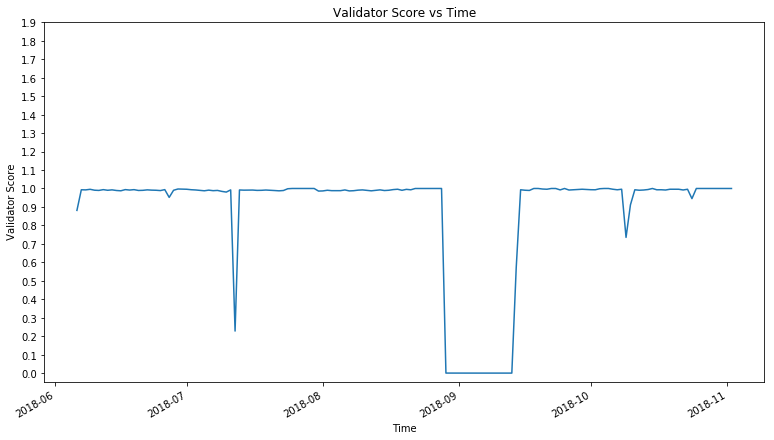

In [74]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(validator_reports2['date'],validator_reports2['score'])
ax.set_xlabel('Time')
ax.set_ylabel(' Validator Score')
ax.set_title('Validator Score vs Time')
plt.yticks(np.arange(min(validator_reports2['score']), max(validator_reports2['score'])+1, 0.1))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

[None, None, None, None, None, None, None, None, None, None, None, None]

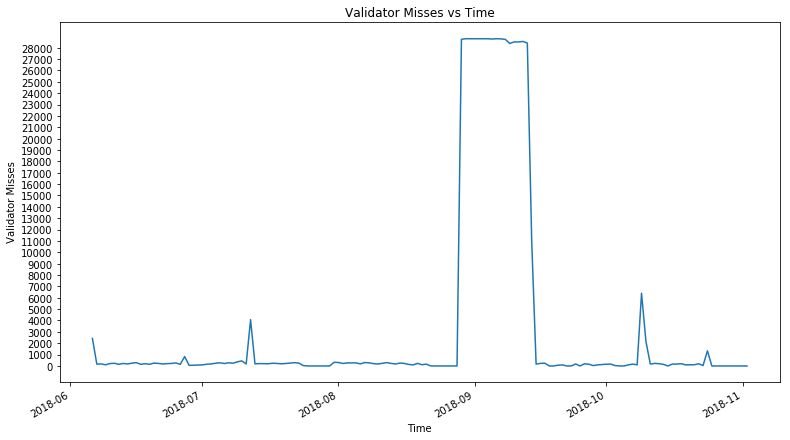

In [79]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(validator_reports2['date'],validator_reports2['missed'])
ax.set_xlabel('Time')
ax.set_ylabel(' Validator Misses')
ax.set_title('Validator Misses vs Time')
plt.yticks(np.arange(min(validator_reports2['missed']), max(validator_reports2['missed'])+1, 1000))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [126]:
#plt.figure(figsize=(7.5,4))
sns.scatterplot(x="date",y='score',data=mergeddf, hue="cls")
#plt.title('Score vs. Time')
#X_plot = dfcoldw['Timestep']
#Y_plot = dfcoldw['Indoor Temp Goal']
#plt.plot(X_plot,Y_plot,color='r')

AttributeError: 'str' object has no attribute 'view'

TypeError: invalid type promotion

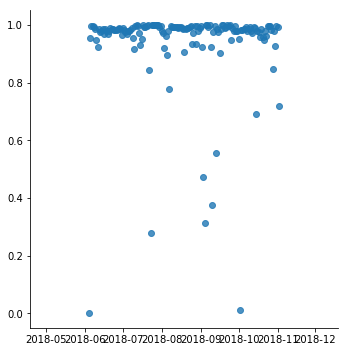

In [127]:
sns.lmplot(x="date",y='score',data=mergeddf, hue="cls")